# PROCEDURE
- load a time series
- iterate through each candle 
- check behind and infront of interator

In [61]:
# DATA SERIALIZATION
import pandas as pd
import numpy as np 

# FETCH DATA
import yfinance as yf
from datetime import datetime

# VISUALIZATION
import matplotlib.pyplot as plt

# FETCH DATA

In [62]:
# Data Extraction
start_date = "2020-11-01"
end_date = datetime.now().strftime("%Y-%m-%d")
symbol = "SPY"

# USE YAHOO FINANCE 
data = yf.download(symbol ,  start_date , end_date )
data = data[["Open" , "High" , "Low" , "Close" , "Volume"]]

data.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-10-25,421.890015,421.920013,417.019989,417.549988,94223200
2023-10-26,416.450012,417.329987,411.600006,412.549988,115156800
2023-10-27,414.190002,414.600006,409.209991,410.679993,107367700
2023-10-30,413.559998,416.679993,412.220001,415.589996,86562700
2023-10-31,416.179993,418.529999,414.209991,418.200012,79589100


# IDENTIFY SWING

In [63]:
# Initialize lists to store swing highs and lows along with their dates
swing_highs = []
swing_high_dates = []
swing_lows = []
swing_low_dates = []

# Iterate through data to find swings
for i in range(1, len(data) - 1):
    prev_high = data.iloc[i - 1]['High']
    curr_high = data.iloc[i]['High']
    next_high = data.iloc[i + 1]['High']

    prev_low = data.iloc[i - 1]['Low']
    curr_low = data.iloc[i]['Low']
    next_low = data.iloc[i + 1]['Low']

    is_swing_high = curr_high >= prev_high and curr_high >= next_high
    is_swing_low  = curr_low  <= prev_low  and curr_low  <= next_low

    if is_swing_high:
        swing_highs.append(curr_high)
        swing_high_dates.append(data.index[i])
        print(f"{data.index[i]}: Found a high swing")
        
    if is_swing_low:
        swing_lows.append(curr_low)
        swing_low_dates.append(data.index[i])
        print(f"{data.index[i]}: Found a low swing")


2020-11-05 00:00:00: Found a high swing
2020-11-06 00:00:00: Found a low swing
2020-11-09 00:00:00: Found a high swing
2020-11-10 00:00:00: Found a low swing
2020-11-11 00:00:00: Found a high swing
2020-11-12 00:00:00: Found a low swing
2020-11-16 00:00:00: Found a high swing
2020-11-19 00:00:00: Found a low swing
2020-11-23 00:00:00: Found a low swing
2020-11-24 00:00:00: Found a high swing
2020-11-27 00:00:00: Found a high swing
2020-11-30 00:00:00: Found a low swing
2020-12-01 00:00:00: Found a high swing
2020-12-02 00:00:00: Found a low swing
2020-12-04 00:00:00: Found a high swing
2020-12-09 00:00:00: Found a high swing
2020-12-11 00:00:00: Found a low swing
2020-12-14 00:00:00: Found a high swing
2020-12-17 00:00:00: Found a high swing
2020-12-21 00:00:00: Found a high swing
2020-12-21 00:00:00: Found a low swing
2020-12-23 00:00:00: Found a high swing
2020-12-29 00:00:00: Found a high swing
2020-12-29 00:00:00: Found a low swing
2021-01-04 00:00:00: Found a high swing
2021-01-04

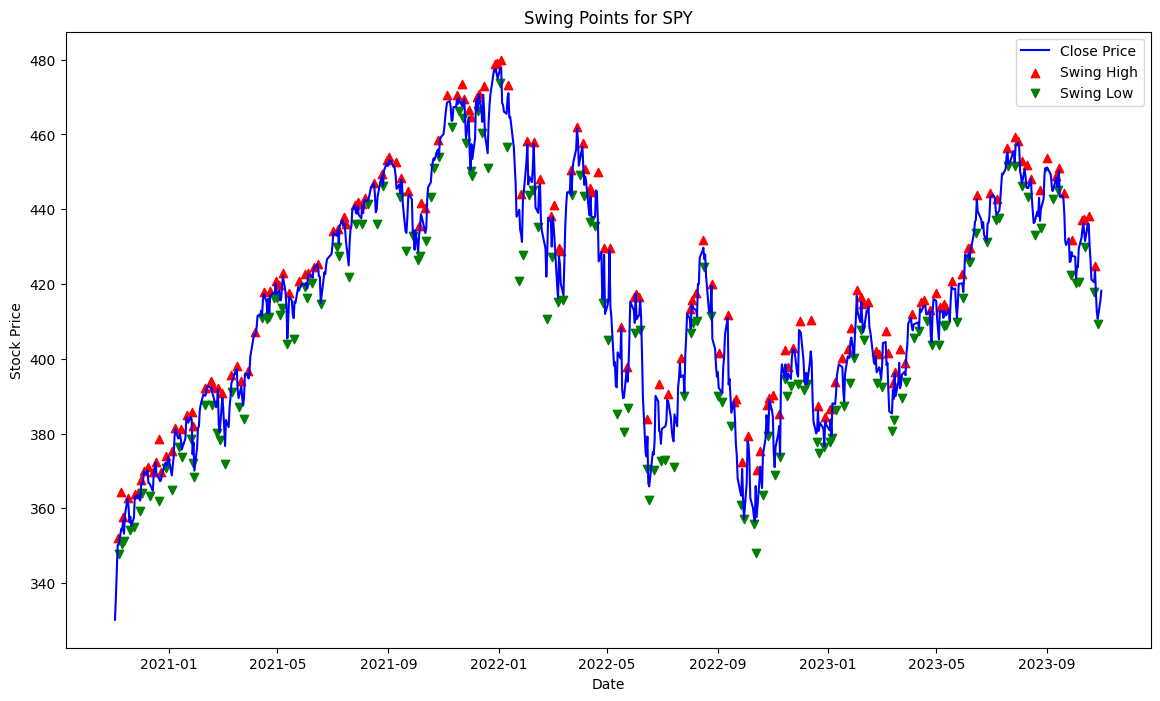

In [64]:
# Create a plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stock price
ax.plot(data.index, data['Close'], label='Close Price', color='blue')

# Add markers for swing highs
ax.scatter(swing_high_dates, swing_highs, label='Swing High', color='red', marker='^')

# Add markers for swing lows
ax.scatter(swing_low_dates, swing_lows, label='Swing Low', color='green', marker='v')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Swing Points for {symbol}')

# Add legend
ax.legend()

# Show the plot
plt.show()
